# Food101 Convolutional Neural Network 🍔

This image classification task on the Food101 dataset with 101 different classes of food will primarily focus on the implementation of Convolutional Neural Networks (CNNs) and data augmentation. Moreover, a strong theoretical grasp of both the architecture and mechanisms of CNNs, as well as the extension of concepts learnt in the previous project with the normal Neural Network, are the main learning goals of this project, especially an understanding of spatial structures, pooling, and filters.<br>
**Main Objectives**:
- <u>Importing the Data</u>
- <u>Train/val/test split</u>
- <u>Exploratory Data Analysis (EDA) and Visualization</u>
- Preprocessing the Data
  - Calculate actual mean and standard deviation of dataset
  - <u>Normalization</u>
- Data Augmentation
- <u>Creating DataLoaders</u>
- Building the model
- Creating the Training Loop
  - Add accuracy metric
- Hyperparameter Tuning
- Test set evaluation
- Metrics for performance - F1 score, precision, recall, confusion_matrix.
- Finding out what kind of images the model's most confident wrong and correct predictions corresponded to, as well as it's most uncertain predictions.

**Extra**:
- Implement a **Convolutional Neural Network** from scratch.
- Implementation should be Modular
- Convolutional Layer (Conv2D)
  - Implement 2D convolution operation with padding and stride options.
  - Weight initiailization and gradient computation for filters.
  - RGB (multiple channels)
- Max Pooling Layer
  - Implement 2D max pooling with stride and window size
  - Backpropagation through max pooling (indices of max values)
- Flatten layer
  - To transition from convolutional layers to fully connected layers.
- Parameter Sharing and Sparse Connectivity
- Stridded Convolutions and Padding (valid/same)
- Batch Normalization for Conv layers
  - Normalize over mini-batch per feature map
  - mean/variance per channel

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd

## Convolutional Neural Network (CNN) Implementation

## Importing the Data + Preprocessing

In [134]:
from torchvision.datasets import Food101
from torchvision.transforms import ToTensor, Normalize, Compose

train_dataset = Food101("food101", split="train", download=True, transform=ToTensor())
test_dataset = Food101("food101", split="test", download=True, transform=ToTensor())

transformations = Compose([ToTensor(), Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

train_dataset_transformed = Food101("food101", split="train", download=True, transform=transformations)
test_dataset_transformed = Food101("food101", split="train", download=True, transform=transformations)

## Train/Test/Validation Split

In [135]:
from torch.utils.data import random_split
train_dataset_transformed, val_dataset_transformed = random_split(train_dataset_transformed, [0.8, 0.2])

## Exploratory Data Analysis (EDA)

In [136]:
# List of all classes
train_dataset.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [137]:
# Number of classes and examples
len(train_dataset.classes), len(train_dataset) + len(test_dataset)

(101, 101000)

There are 101 classes and 101,000 images in the dataset.

In [138]:
# Check the distribution of classes
values, counts = torch.unique(torch.tensor(train_dataset._labels), return_counts=True)
print("The number of classes is: {0}\nBelow is the number of instances for all the classes: ".format(len(counts)))
counts

The number of classes is: 101
Below is the number of instances for all the classes: 


tensor([750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750])

This confirms that for each of the 101 classes, there are 750 instances in the training set.

In [139]:
index_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

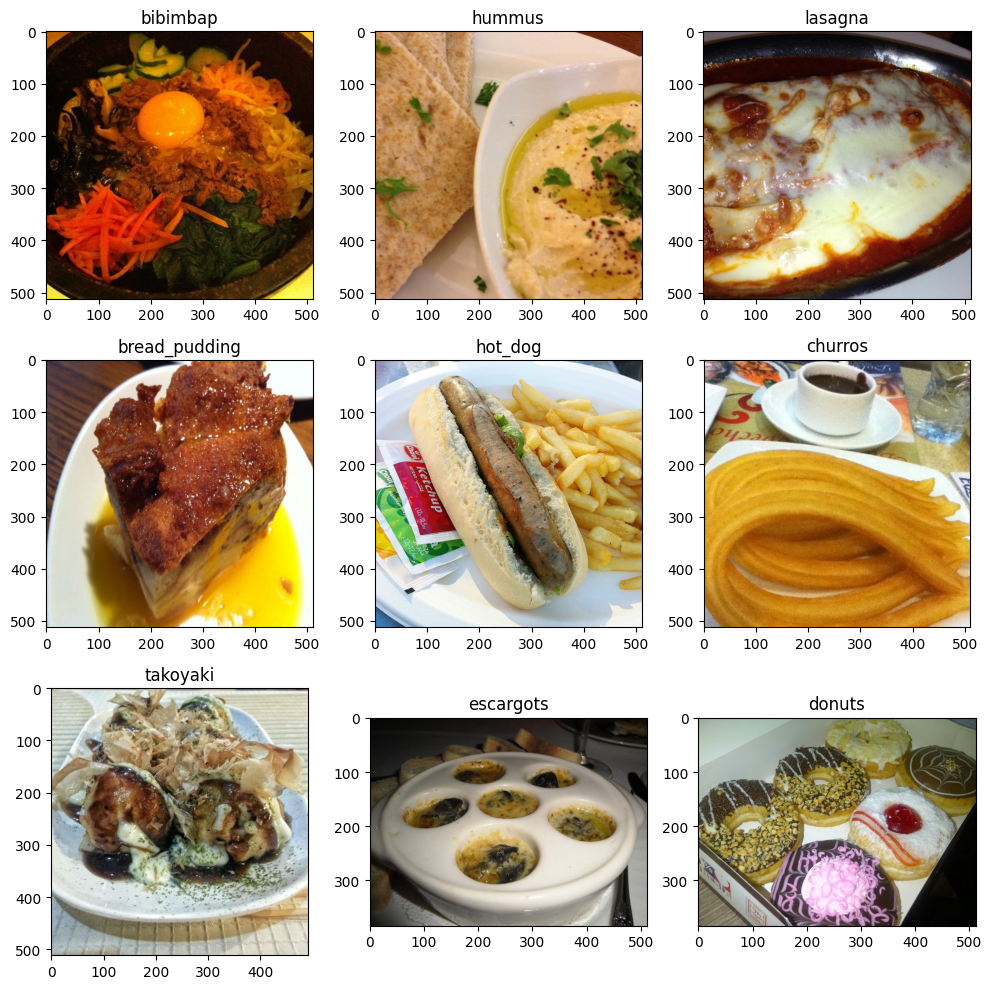

In [143]:
# Visualize some of the classes
from random import randint

fig, ax = plt.subplots(3, 3)
images = []
labels = []
random_foods = []
for i in range(0, 10):
  random_foods.append(randint(0, len(train_dataset)))

for food_index in random_foods:
  image, label = train_dataset[food_index] # images are (3, 512, 512)
  image = image.permute(1, 2, 0) # convert to (512, 512, 3) by reordering for imshow
  images.append(image)
  labels.append(label)

fig.set_figheight(10)
fig.set_figwidth(10)
ax[0, 0].imshow(images[0])
ax[0, 0].set_title(index_to_class[labels[0]])
ax[0, 1].imshow(images[1])
ax[0, 1].set_title(index_to_class[labels[1]])
ax[0, 2].imshow(images[2])
ax[0, 2].set_title(index_to_class[labels[2]])
ax[1, 0].imshow(images[3])
ax[1, 0].set_title(index_to_class[labels[3]])
ax[1, 1].imshow(images[4])
ax[1, 1].set_title(index_to_class[labels[4]])
ax[1, 2].imshow(images[5])
ax[1, 2].set_title(index_to_class[labels[5]])
ax[2, 0].imshow(images[6])
ax[2, 0].set_title(index_to_class[labels[6]])
ax[2, 1].imshow(images[7])
ax[2, 1].set_title(index_to_class[labels[7]])
ax[2, 2].imshow(images[8])
ax[2, 2].set_title(index_to_class[labels[8]])
plt.tight_layout()
plt.show()

## Creating DataLoader

In [141]:
# DataLoader
from torch.utils.data import Dataset, DataLoader

train_dataloader = DataLoader(train_dataset_transformed, batch_size=32, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset_transformed, batch_size=32, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_dataset_transformed, batch_size=32, shuffle=False, num_workers=2)

## Building the Model + Training Loop

In [142]:
class CNN(nn.Module):
  def __init__(self):
    pass

  def forward(self, X):
    pass